# <center> Майнор "Интеллектуальный анализ данных" </center>

# <center> Курс "Современные методы машинного обучения" </center>

# <center> Лабораторная работа №1. Image Classification. </center>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import glob
import torch
import torchvision
from torch import nn
from torch.optim import lr_scheduler

import warnings

warnings.filterwarnings('ignore')

In [3]:
df = pd.DataFrame(columns=['Epochs',
                           'Layers',
                           'Output Neurons Number (1)',
                           'Output Neurons Number (2)',
                           'Output Neurons Number (3)',
                           'Activation', 
                           'Optimizer', 
                           'Learning Rate',
                           'Momentum',
                           'Batch Size',
                           'Scheduler',
                           'Augmentation',
                           'Batch Normalization', 
                           'Dropout', 
                           'Accuracy',
                           'Avg Loss'])

In [5]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

Using cpu device


## Основные задания

Ваша задача - создать и обучить модель на основе нейронной сети, которая будет предсказывать букву на картинке.  
Обучение необходимо проводить на данных из `train`, качество модели проверять на данных из `test`.  
Целевая метрика - accuracy.  
Для моделирования необходимо использовать `pytorch`.

### Задание 1  
  
*Вес в общей оценке - 0.35*  
  
1. Постройте и обучите модели с 2-мя и 3-мя полносвязными (dense) скрытыми слоями.  
При моделировании необходимо попробовать разные параметры нейронной сети - число нейронов на каждом слое, learning rate, batch size, функции активации, регуляризации и т.д. Оцените качество моделей с различными параметрами, проведите сравнительный анализ.   

In [19]:
dt = pd.read_csv('results.csv') 

### О ходе работы:

В первую очередь мне показалось разумным все изображения привести к __Grayscale__, так как изображения и так черно-белые, а обработка трех каналов занимает больше времени. Я решила протестировать, скажется ли изменение с RGB на черно-белое изображение на результате, но это никак не повлияло. Соотвественно, я оставила трансформацию изображения в формат Grayscale.

Затем я перешла к созданию нейронной сети с __двумя скрытыми слоями__.

В начале тестирования я рассматривала разные __размеры батчей__ (от 32 до 256, не хотелось брать слишком маленькие батчи, при условии, что у нас 26 классов, но и слишком большие тоже), __количество нейронов__ (от 64 до 1024 на разных слоях) и __learning rate__ (от 0.001 до 0.1). __Learning rate__ я выбирала на основе того, как хорошо прогрессировала модель на каждой эпохе. Если уже на первых эпохах accuracy на тестовом множестве изменялась на очень маленькое значение или вообще не изменялось, я увеличивала learning rate (стоит отметить, что я говорю о тех случаях, когда на первых эпохах точность была менее 50%). Касательно __архитектуры__ я сделала вывод, что лучше работает, когда первый скрытый слой больше или равен второму. По такому принципу я выбирала и архитектуру для сети с тремя скрытыми слоями.

На основе таблицы с точностью на тестовых данных (results.csv) я выбрала модели, которые мне показались наиболее удачными. 

Размер батчей = 32:
- Количество нейронов на первом слое = 1024, на втором = 512.
- Количество нейронов на первом слое = 1024, на втором = 256.

Размер батчей = 64:
- Количество нейронов на первом слое = 1024, на втором = 512.
- Количество нейронов на первом слое = 1024, на втором = 256.

Точность примерно 89-89.5%.

Когда к __SGD__ я добавила __momentum__, модель за меньшее кол-во эпох начала достигать хорошего значения accuracy. А также стало понятно, что чем больше __momentum__, тем лучше результат. 
Еще пробовала изменить optimizer на __Adam__ и __AdamW__, но accuracy стала около 3-4% и совсем не менялась в следующих эпохах (тестировала на разных lr, меньше и больше того, что был выбран на предыдущем шаге оптимальным). В таблице этого нет, так как я останавливала цикл, видя, что после 10 эпохи изменений нет и точность очень низкая.

In [34]:
dt.loc[43:50, :]

,Epochs,Layers,Output Neurons Number (1),Output Neurons Number (2),Output Neurons Number (3),Activation,Optimizer,Learning Rate,Momentum,Batch Size,Scheduler,Augmentation,Batch Normalization,Dropout,Accuracy,Avg Loss
43,30,2,1024,256,-,ReLU(),SGD,0.01,0.3,64,-,-,-,-,89.71,0.339118
44,30,2,1024,256,-,ReLU(),SGD,0.01,0.5,64,-,-,-,-,89.76,0.319942
45,30,2,1024,256,-,ReLU(),SGD,0.01,0.7,64,-,-,-,-,90.86,0.308922
46,30,2,1024,256,-,ReLU(),SGD,0.01,0.9,64,-,-,-,-,91.14,0.371434
47,30,2,1024,512,-,ReLU(),SGD,0.01,0.3,64,-,-,-,-,89.45,0.340626
48,30,2,1024,512,-,ReLU(),SGD,0.01,0.5,64,-,-,-,-,90.39,0.312063
49,30,2,1024,512,-,ReLU(),SGD,0.01,0.7,64,-,-,-,-,90.83,0.307398
50,30,2,1024,512,-,ReLU(),SGD,0.01,0.9,64,-,-,-,-,91.21,0.362848


Также я применила разные функции активации: __ReLU__ (изначально использовала эту функцию), __Sigmoid__ и __LogSigmoid__. На модели с двумя слоями (1024 и 256) хорошо себя показали __Sigmoid__ и __ReLU__, остальные были немного хуже. Sigmoid лучше работала с другим learning rate, нежели ReLU.

In [35]:
dt.loc[58:66, :]

,Epochs,Layers,Output Neurons Number (1),Output Neurons Number (2),Output Neurons Number (3),Activation,Optimizer,Learning Rate,Momentum,Batch Size,Scheduler,Augmentation,Batch Normalization,Dropout,Accuracy,Avg Loss
58,30,2,1024,256,-,Sigmoid(),SGD,0.01,0.9,64,-,-,-,-,86.54,0.438447
59,30,2,1024,256,-,ReLU(),SGD,0.01,0.9,64,-,-,-,-,91.05,0.375323
60,30,2,1024,256,-,LogSigmoid(),SGD,0.01,0.9,64,-,-,-,-,88.85,0.360765
61,30,2,1024,256,-,Sigmoid(),SGD,0.05,0.9,64,-,-,-,-,90.57,0.304621
62,30,2,1024,256,-,ReLU(),SGD,0.05,0.9,64,-,-,-,-,90.21,0.621866
63,30,2,1024,256,-,LogSigmoid(),SGD,0.05,0.9,64,-,-,-,-,89.54,0.565316
64,30,2,1024,256,-,Sigmoid(),SGD,0.10,0.9,64,-,-,-,-,91.18,0.336689
65,30,2,1024,256,-,ReLU(),SGD,0.10,0.9,64,-,-,-,-,86.81,0.912914
66,30,2,1024,256,-,LogSigmoid(),SGD,0.10,0.9,64,-,-,-,-,88.79,0.670474


Добавила __scheduler__, чтобы избежать больших колебаний из-за learning rate. Подошел с шагом в 7.

In [40]:
dt.loc[67:68, :]

,Epochs,Layers,Output Neurons Number (1),Output Neurons Number (2),Output Neurons Number (3),Activation,Optimizer,Learning Rate,Momentum,Batch Size,Scheduler,Augmentation,Batch Normalization,Dropout,Accuracy,Avg Loss
67,30,2,1024,256,-,ReLU(),SGD,0.01,0.9,64,5,-,-,-,90.72,0.298370
68,30,2,1024,256,-,ReLU(),SGD,0.01,0.9,64,7,-,-,-,91.13,0.281939


В процессе также добавила транспонирование картинок, но за счет функций __RandomRotation__ и __RandomHorizontalFlip__. Плюс, __RandomRotation__ в диапозоне [-20, 20] градусов. В предыдущих тестированиях я сталкивалась с тем, что train average loss и test average loss сильно отличались (в 2-3 раза), введение аугментации помогло избежать этого переобучения + я сократила кол-во эпох по итогу экспериментов.

In [42]:
dt.loc[69:69, :]

,Epochs,Layers,Output Neurons Number (1),Output Neurons Number (2),Output Neurons Number (3),Activation,Optimizer,Learning Rate,Momentum,Batch Size,Scheduler,Augmentation,Batch Normalization,Dropout,Accuracy,Avg Loss
69,30,2,1024,256,-,ReLU(),SGD,0.01,0.9,64,7,RandomRotation,-,-,91.44,0.265926


__Dropout__ тестировала со значениями от 0.2 до 0.4. Только 0.3 не ухудшил результат.

In [43]:
dt.loc[70:72, :]

,Epochs,Layers,Output Neurons Number (1),Output Neurons Number (2),Output Neurons Number (3),Activation,Optimizer,Learning Rate,Momentum,Batch Size,Scheduler,Augmentation,Batch Normalization,Dropout,Accuracy,Avg Loss
70,25,2,1024,256,-,ReLU(),SGD,0.01,0.9,64,7,RandomRotation,-,0.2,91.28,0.266165
71,25,2,1024,256,-,ReLU(),SGD,0.01,0.9,64,7,RandomRotation,-,0.3,91.44,0.265461
72,25,2,1024,256,-,ReLU(),SGD,0.01,0.9,64,7,RandomRotation,-,0.4,91.13,0.275036


__BatchNorm__ помог улучшить точность почти на процент.

In [47]:
dt.loc[73:73, :]

,Epochs,Layers,Output Neurons Number (1),Output Neurons Number (2),Output Neurons Number (3),Activation,Optimizer,Learning Rate,Momentum,Batch Size,Scheduler,Augmentation,Batch Normalization,Dropout,Accuracy,Avg Loss
73,25,2,1024,256,-,ReLU(),SGD,0.01,0.9,64,7,RandomRotation,+,0.3,92.3,0.235907


На этом моменте я решила, что у меня вряд ли получится еще как-то улучшить accuracy, поэтому я остановилась на этих параметрах и модели.

__Лучший результат для нейронной сети с двумя скрытыми слоями: 92.3%__

При создании сети с __тремя скрытыми слоями__ я сначала провела эксперименты, чтобы понять, с каким количеством нейронов на каждом слое буду работать (хотя 1024 на первом я взяла сразу и не тестировала другие). __Activation function, optimizer, scheduler__ и __аугментация__ остались такими же, как в предыдущей модели. Но решила протестировать __dropout__ и __batch normalization__.

После ряда тестирований, лучшей моделью из того, что я рассматривала, оказались две модели:

Размер батчей = 64:
- Количество нейронов на первом слое = 1024, на втором = 1024, на третьем = 256.
- Количество нейронов на первом слое = 1024, на втором = 512, на третьем = 256.

В основном я эксперементировала со второй моделью.

После нахождения оптимального значения dropout, я добавила BatchNorm, значение сильно улучшилось.

In [9]:
dt.loc[87:88, :]

,Epochs,Layers,Output Neurons Number (1),Output Neurons Number (2),Output Neurons Number (3),Activation,Optimizer,Learning Rate,Momentum,Batch Size,Scheduler,Augmentation,Batch Normalization,Dropout,Accuracy,Avg Loss
87,25,3,1024,512,256,ReLU(),SGD,0.01,0.9,64,7,RandomRotation,-,0.2,91.85,0.257215
88,25,3,1024,512,256,ReLU(),SGD,0.01,0.9,64,7,RandomRotation,+,0.2,92.62,0.220140


Потом я эксперементировала со scheduler и добилась улучшения результата до __92,98%__.

In [20]:
dt.loc[90:96, :]

,Epochs,Layers,Output Neurons Number (1),Output Neurons Number (2),Output Neurons Number (3),Activation,Optimizer,Learning Rate,Momentum,Batch Size,Scheduler,Augmentation,Batch Normalization,Dropout,Accuracy,Avg Loss
90,30,3,1024,512,256,ReLU(),SGD + Nesterov,0.01,0.9,64,7,RandomRotation,+,0.2,92.62,0.219227
91,30,3,1024,512,256,ReLU(),SGD + Nesterov,0.01,0.9,64,5,RandomRotation,+,0.2,92.27,0.235039
92,25,3,1024,512,256,ReLU(),SGD + Nesterov,0.01,0.9,64,7,RandomRotation,+,0.2,92.73,0.218598
93,30,3,1024,512,256,ReLU(),SGD + Nesterov,0.02,0.9,64,7,RandomRotation,+,0.2,92.98,0.212502
94,30,3,1024,512,256,ReLU(),SGD + Nesterov,0.03,0.9,64,3,RandomRotation,+,0.2,91.92,0.239700
95,30,3,1024,512,256,ReLU(),SGD + Nesterov,0.03,0.9,64,5,RandomRotation,+,0.2,92.67,0.215815
96,30,3,1024,512,256,ReLU(),SGD + Nesterov,0.04,0.9,64,5,RandomRotation,+,0.2,92.72,0.218034


In [14]:
transformation_train = [torchvision.transforms.Grayscale(num_output_channels=1),
                       torchvision.transforms.RandomRotation((-90, -90)),
                       torchvision.transforms.RandomHorizontalFlip(p=1.0),
                       torchvision.transforms.RandomRotation((-20, 20)),
                       torchvision.transforms.ToTensor(),]

transformation_test = [torchvision.transforms.Grayscale(num_output_channels=1),
                       torchvision.transforms.RandomRotation((-90, -90)),
                       torchvision.transforms.RandomHorizontalFlip(p=1.0),
                       torchvision.transforms.ToTensor(),]


    
dataset = torchvision.datasets.ImageFolder(
            "./images/train", 
            transform=torchvision.transforms.Compose(transformation_train)
        )

test_dataset = torchvision.datasets.ImageFolder(
            "./images/test", 
            transform=torchvision.transforms.Compose(transformation_test)
        )

In [15]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    train_loss, count = 0, 0
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)


        optimizer.zero_grad()

        pred = model(X)
        loss = loss_fn(pred, y)

        train_loss += loss.item()
        count += 1

        loss.backward()
        optimizer.step()

    loss = train_loss / count
    print(f"Avg train loss: {loss:>7f}")


def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size

    accuracy = round(100*correct, 2)
    avg_loss = round(test_loss, 6)

    print(f"Test Error: \n Accuracy: {(100*correct):>0.2f}%, Avg loss: {test_loss:>8f} \n")
    avg_loss = str(avg_loss)
    return accuracy, avg_loss

In [18]:
dropout = 0.2

batch_size = 64

out_num_first = 1024
out_num_sec = 512
out_num_third = 256

activation = nn.ReLU()
learning_rate = 0.02

momentum = 0.9

stepsize = 7
gamma = 0.1


class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, out_num_first),
            nn.BatchNorm1d(out_num_first),
            activation,
            nn.Dropout(p=dropout),
            nn.Linear(out_num_first, out_num_sec),
            nn.BatchNorm1d(out_num_sec),
            activation,
            nn.Dropout(p=dropout),
            nn.Linear(out_num_sec, out_num_third),
            activation,
            nn.Linear(out_num_third, 26)
        )

    def forward(self, x):
        x = self.flatten(x)
        x = self.linear_relu_stack(x)
        logits = x
        return logits

model_linear = NeuralNetwork().to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_linear.parameters(), lr=learning_rate, momentum=momentum, nesterov=True)
scheduler = lr_scheduler.StepLR(optimizer, step_size=stepsize, gamma=gamma)

train_dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

epochs = 30

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model_linear, loss_fn, optimizer)
    scheduler.step()
    acc, avg = test(test_dataloader, model_linear, loss_fn)

Epoch 1
-------------------------------
Avg train loss: 0.908183
Test Error: 
 Accuracy: 85.02%, Avg loss: 0.463742 

Epoch 2
-------------------------------
Avg train loss: 0.549709
Test Error: 
 Accuracy: 88.48%, Avg loss: 0.356508 

Epoch 3
-------------------------------
Avg train loss: 0.465690
Test Error: 
 Accuracy: 89.38%, Avg loss: 0.317810 

Epoch 4
-------------------------------
Avg train loss: 0.415006
Test Error: 
 Accuracy: 90.42%, Avg loss: 0.289092 

Epoch 5
-------------------------------
Avg train loss: 0.385228
Test Error: 
 Accuracy: 90.70%, Avg loss: 0.276427 

Epoch 6
-------------------------------
Avg train loss: 0.361128
Test Error: 
 Accuracy: 91.34%, Avg loss: 0.265949 

Epoch 7
-------------------------------
Avg train loss: 0.338957
Test Error: 
 Accuracy: 91.73%, Avg loss: 0.256491 

Epoch 8
-------------------------------
Avg train loss: 0.282498
Test Error: 
 Accuracy: 92.39%, Avg loss: 0.228923 

Epoch 9
-------------------------------
Avg train loss: 

2. Для наилучшей модели постройте confusion matrix результатов предсказаний модели на тестовых данных.  
Насколько равномерно обучилась ваша модель? Приведите буквы с самой лучшей и с самой худшей точностью детекции.

<AxesSubplot:>

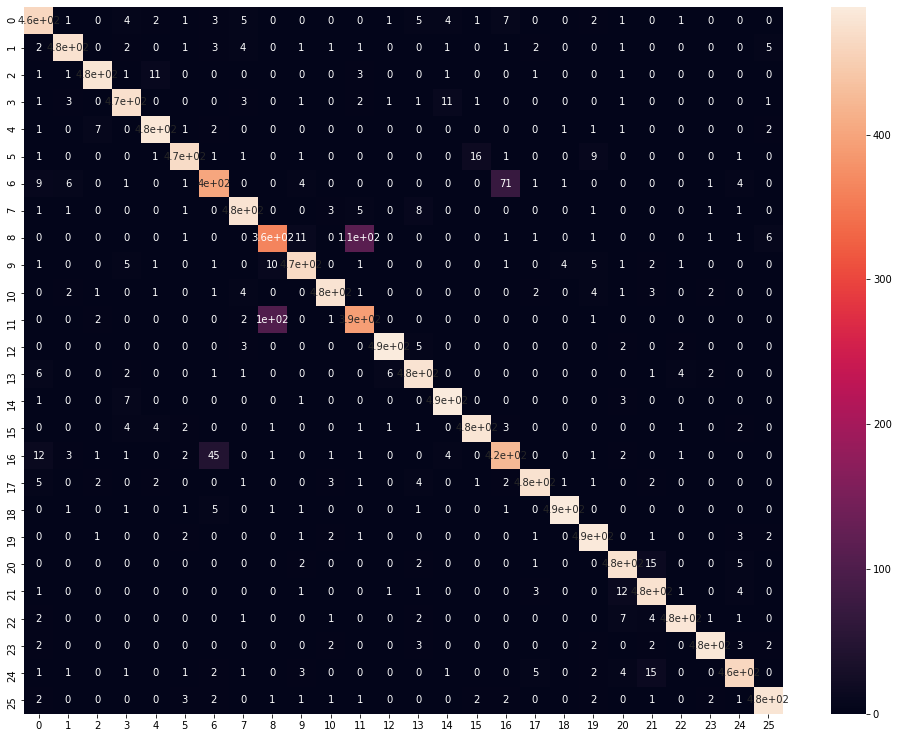

In [27]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

nb_classes = 26

predlist=torch.zeros(0,dtype=torch.long, device='cpu')
lbllist=torch.zeros(0,dtype=torch.long, device='cpu')

with torch.no_grad():
    for X, y in test_dataloader:
        X, y = X.to(device), y.to(device)
        pred = model_linear(X)
        _, preds = torch.max(pred, 1)


        predlist=torch.cat([predlist,preds.view(-1).cpu()])
        lbllist=torch.cat([lbllist,y.view(-1).cpu()])

# Confusion matrix
conf_mat=confusion_matrix(lbllist.numpy(), predlist.numpy())

plt.figure(figsize=(17,13))
sns.heatmap(conf_mat, annot=True)

In [25]:
# Per-class accuracy
class_accuracy=100*conf_mat.diagonal()/conf_mat.sum(1)
print(class_accuracy)

[92.4 95.  96.  94.8 96.8 93.6 80.2 95.6 72.8 93.4 95.6 78.4 97.6 95.4
 97.6 96.  85.  95.  97.6 97.2 95.  95.2 96.2 96.8 92.6 95.8]


Лучше всего __m, o, t__, а хуже всего - __l__ и __i__.

3. Найдите 10 пар букв, которые чаще всего путаются между собой, дайте возможное объяснение. Приведите примеры с картинками, которые были детектированы с ошибкой.

- Больше всего путаются l и i, потому что заглавная I и строчная l часто пишутся одинаково. 
- Строчные g и q тоже очень похожи, поэтому сеть их может иногда перепутать.
- Бывает, что V путаются с U и Y (из-за того, что все буквы имеют некоторую форму галочки).
- Иногда A считается за Q (a и q строчные могут быть похоже написаны).
- I и J (из-за того, что верхние половины букв очень похожи).
- c и e.
- F и P.
- D и O.
- g и a.
- f и t.

In [81]:
for i in range(50):
    if predlist[i] != lbllist[i]:
        print(i)
        print(predlist[i], lbllist[i])

14
tensor(13) tensor(0)
24
tensor(13) tensor(0)
41
tensor(14) tensor(0)
42
tensor(7) tensor(0)


4. Возьмите первую букву вашей фамилии и укажите её точность детекции. С какими буквами ваша модель чаще всего путает эту букву?   

Буква N детектируется с точностью 95.4%. Чаще всего путается с H, M и A.

### Задание 2  
  
*Вес в общей оценке - 0.35*  
  
1. Постройте и обучите модели нейронной сети с 1-м, 2-мя и 3-мя сверточными слоями.  
Попробуйте различные значения параметров сверток и числа фильтров на каждом слое. Оцените качество моделей с различными параметрами, проведите сравнительный анализ.    

Все эксперименты можно увидеть в файле results_convolutional.csv.

Изначально для всех моделей я выбирала кол-во выходных каналов, находила оптимальный learning rate в тот момент, добавила maxpool, искала, с каким padding модель лучше, потом начала экспериментировать с dropout, добавляла batchnorm, экспериметировала со scheduler (и изменяла learning_rate).
Только на нейронной сети с одним слоем я особо не останавливалась и бегло посмотрела, какая архитектура работает лучше.


__Результаты:__
- По итогу лучшей точностью для нейронной сети с 1-м слоем: __92.95%__
- С 2-мя слоями: __94.49%__
- С 3-мя слоями: __94.98%__

In [33]:
df_conv = pd.DataFrame(columns=['Epochs',
                               'Batch Size',
                               'Learning Rate',
                               'Convolutional Layers',
                               'Filter Size',
                               'Padding',
                               'Channels Number',
                               'Maxpool',
                               'Linear Layers Number',
                               'Activation', 
                               'Softmax',
                               'Batch Normalization',
                               'GroupNorm',
                               'Dropout', 
                               'Optimizer', 
                               'Scheduler',
                               'Stepsize',
                               'Accuracy',
                               'Avg Loss'])

In [28]:
transformation_train = [torchvision.transforms.Grayscale(num_output_channels=1),
                       torchvision.transforms.RandomRotation((-90, -90)),
                       torchvision.transforms.RandomHorizontalFlip(p=1.0),
                       torchvision.transforms.RandomRotation((-20, 20)),
                       torchvision.transforms.ToTensor(),]

transformation_test = [torchvision.transforms.Grayscale(num_output_channels=1),
                       torchvision.transforms.RandomRotation((-90, -90)),
                       torchvision.transforms.RandomHorizontalFlip(p=1.0),
                       torchvision.transforms.ToTensor(),]

    
dataset = torchvision.datasets.ImageFolder(
            "./images/train", 
            transform=torchvision.transforms.Compose(transformation_train)
        )

test_dataset = torchvision.datasets.ImageFolder(
            "./images/test", 
            transform=torchvision.transforms.Compose(transformation_test)
        )

In [ ]:
batch_size = 128

convlayers = 3
linnum = 2

first_out = 16
second_out = 32
third_out = 38

filter_size = 5
padding = 0

activation = nn.ReLU()
learning_rate = 0.01

maxpool = '+'
softmax = '-'
dropout = 0.2
bnorm = '+'
gnorm = '-'

opt = 'SGD + Momentum 0.9'
momentum = 0.9

sched = '+'
stepsize = 7
gamma = 0.1

aug = 'RandomRotation'

count = 0

train_dataloader = torch.utils.data.DataLoader(dataset, 
                                               batch_size=batch_size, 
                                               shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_dataset, 
                                              batch_size=batch_size, 
                                              shuffle=False)


    
h = (28 + 3 - (3*filter_size)) // 2
w = h

count += 1

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.vgg = nn.Sequential(
          nn.Conv2d(1, first_out, filter_size, padding=padding),
          nn.BatchNorm2d(first_out),
          activation,
          nn.Dropout(p=dropout),
          nn.Conv2d(first_out, second_out, filter_size, padding=padding),
          nn.BatchNorm2d(second_out),
          activation,
          nn.Dropout(p=dropout),
          nn.Conv2d(second_out, third_out, filter_size, padding=padding),
          nn.BatchNorm2d(third_out),
          activation,
          nn.MaxPool2d(2, 2)
        )
        self.fc1 = nn.Linear(third_out * h * w, 128)
        self.relu = activation
        self.fc2 = nn.Linear(128, 26)

    def forward(self, x):
        x = self.vgg(x)
        x = nn.Flatten()(x)
        x = self.relu(self.fc1(x))
        logits = self.fc2(x)
        return logits

model = NeuralNetwork().to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), 
                            lr=learning_rate, 
                            momentum=momentum,
                            nesterov=True)
scheduler = lr_scheduler.StepLR(optimizer, 
                                step_size=stepsize, 
                                gamma=gamma)

epochs = 15

for t in range(epochs):
    print(f"({count}) Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    scheduler.step()
    acc, avg = test(test_dataloader, model, loss_fn)

df_conv = df_conv.append({
    'Epochs' : epochs,
    'Batch Size' : batch_size,
    'Learning Rate': learning_rate,
    'Convolutional Layers' : convlayers,
    'Filter Size' : filter_size,
    'Padding' : padding,
    'Channels Number' : str(first_out) + ' ' + str(second_out) + ' ' + str(third_out),
    'Maxpool' : maxpool,
    'Linear Layers Number' : linnum,
    'Activation' : activation, 
    'Softmax' : softmax,
    'Batch Normalization' : bnorm,
    'GroupNorm' : gnorm,
    'Dropout' : dropout, 
    'Optimizer' : opt, 
    'Scheduler' : sched,
    'Stepsize': stepsize,
    'Accuracy' : acc,
    'Avg Loss' : avg }, ignore_index=True
)

(1) Epoch 1
-------------------------------
Avg train loss: 0.716024
Test Error: 
 Accuracy: 90.08%, Avg loss: 0.310262 

(1) Epoch 2
-------------------------------
Avg train loss: 0.329909
Test Error: 
 Accuracy: 92.15%, Avg loss: 0.236354 

(1) Epoch 3
-------------------------------


2. Для наилучшей конфигурации из предыдущего пункта, сравните, как меняется качество модели при увеличении размера батча при использовании BatchNorm и GroupNorm.  

In [105]:
dt_conv = pd.read_csv('results_convolutional.csv') 

Чем больше батч, тем медленнее обучается, но на данной модели это сыграло на руку, и батч 128 оказался даже удачнее, чем 64 (конкретно с BatchNorm)

In [96]:
dt_conv.loc[61:63, :]

,Epochs,Batch Size,Learning Rate,Convolutional Layers,Filter Size,Padding,Channels Number,Maxpool,Linear Layers Number,Activation,Softmax,Batch Normalization,GroupNorm,Dropout,Optimizer,Scheduler,Stepsize,Accuracy,Avg Loss
61,30,64,0.01,3,5,0,16 32 38,+,2,ReLU(),-,+,-,0.2,SGD + Momentum 0.9,+,7,94.75,0.161313
62,30,128,0.01,3,5,0,16 32 38,+,2,ReLU(),-,+,-,0.2,SGD + Momentum 0.9,+,7,94.78,0.152255
63,30,256,0.01,3,5,0,16 32 38,+,2,ReLU(),-,+,-,0.2,SGD + Momentum 0.9,+,7,94.44,0.164755


In [106]:
dt_conv.loc[64:65, :]

,Epochs,Batch Size,Learning Rate,Convolutional Layers,Filter Size,Padding,Channels Number,Maxpool,Linear Layers Number,Activation,Softmax,Batch Normalization,GroupNorm,Dropout,Optimizer,Scheduler,Stepsize,Accuracy,Avg Loss
64,30,64,0.01,3,5,0,16 32 38,+,2,ReLU(),-,-,+,0.2,SGD + Momentum 0.9,+,7,94.45,0.167648
65,30,128,0.01,3,5,0,16 32 38,+,2,ReLU(),-,-,+,0.2,SGD + Momentum 0.9,+,7,94.29,0.165046


### Задание 3    
  
Обучите модель с точностью (accuracy) на тестовых данных:  
- `>= 0.85`    +1 балл
- `>= 0.95`    +2 балла
- `>= 0.99`    +3 балла  

## Бонусные задания

**Задание 1 (1 балл).**  

Напишите на листке белой бумаги (маркером или ручкой) от 5 разных букв (можно больше 5 букв в целом с повторениями, но должно быть минимум 5 разных) английского алфавита (в датасете есть как прописные, так и строчные буквы). Сфотографируйте букву и приведите её картинку к размеру $28\times28$ и, желательно, к чёрно-белой палитре цветов. Передайте получившиеся изображения вашей модели и выполните предсказание, оцените результат.  
  
**Tips:**  
- В датасете все буквы занимают практически всё пространство картинки по высоте или ширине (или вместе). Если ваша буква будет слишком маленькой или большой, это может повлиять на результат детекции.
- Помните, что буква должна быть белого цвета, а фон - чёрного.
- Описание ваших действий при выполнении этого задания (что вы использовали, чтобы привести картинку к нужному виду) категорически приветствуется :)

### Как проводила эксперимент:

Я решила в заметках телефона на черном фоне написать белым маркером, потом скадрировала и начала работать с изображениями уже здесь.

In [59]:
import cv2

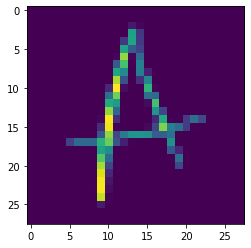

In [66]:
image = plt.imread('a.jpg')

image = cv2.resize(image, (28,28), interpolation=cv2.INTER_AREA)
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(image)
plt.show()

In [67]:
image = torch.tensor(image)
image = torch.div(image, 255)

In [69]:
res_tens = model(image.reshape([1,1,28,28]))
res_tens.argmax(1)

tensor([0])

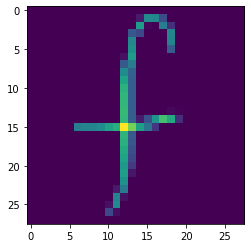

tensor([5])

In [70]:
image = plt.imread('f.jpg')

image = cv2.resize(image, (28,28), interpolation=cv2.INTER_AREA)
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(image)
plt.show()

image = torch.tensor(image)
image = torch.div(image, 255)

res_tens = model(image.reshape([1,1,28,28]))
res_tens.argmax(1)

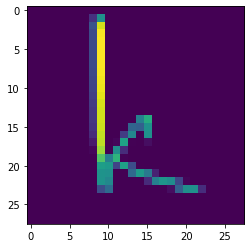

tensor([10])

In [71]:
image = plt.imread('k.jpg')

image = cv2.resize(image, (28,28), interpolation=cv2.INTER_AREA)
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(image)
plt.show()

image = torch.tensor(image)
image = torch.div(image, 255)

res_tens = model(image.reshape([1,1,28,28]))
res_tens.argmax(1)

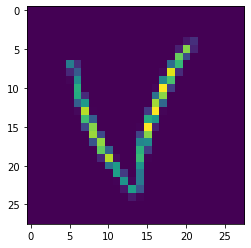

tensor([21])

In [72]:
image = plt.imread('v.jpg')

image = cv2.resize(image, (28,28), interpolation=cv2.INTER_AREA)
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(image)
plt.show()

image = torch.tensor(image)
image = torch.div(image, 255)

res_tens = model(image.reshape([1,1,28,28]))
res_tens.argmax(1)

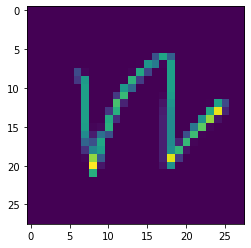

tensor([13])

In [73]:
image = plt.imread('n.jpg')

image = cv2.resize(image, (28,28), interpolation=cv2.INTER_AREA)
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(image)
plt.show()

image = torch.tensor(image)
image = torch.div(image, 255)

res_tens = model(image.reshape([1,1,28,28]))
res_tens.argmax(1)

### Модель все правильно определила.